In [93]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
from scipy import stats
from src.qualitative_analysis import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
def calculate_probabilities(X, step):
    prob_dist = stats.norm(loc=0, scale=1)
    noise_dist = stats.norm(loc=0, scale=step)
    pdf_values = prob_dist.pdf(X) * np.sqrt(2 * np.pi)
    noise = noise_dist.rvs(size=X.shape[0]) * ((pdf_values + 0.1) * (1 - pdf_values + 0.1)) ** 1.5 * 10
    noisy_pdf_values = pdf_values + noise
    noisy_pdf_values = np.clip(noisy_pdf_values, 0, 1)
    prob = np.column_stack((1 - noisy_pdf_values, noisy_pdf_values))
    print("avg noise ", np.average(np.abs(noise)))
    return prob

In [95]:
# configurable variables
noise = 3
noises = np.arange(3, 12, 0.1)
p_true_dist = stats.norm(loc=0, scale=1)
X = p_true_dist.rvs(size=40000)

In [96]:
p_true = util.svm_interpolated_probs(X, noise)
y_true = np.array(list(map(lambda x: 1 if random.random() < x[1] else 0, p_true)))

avg noise  0.020516034005427997


Plotting Predicted Probability Distributions...
avg noise  0.02034992012246616
avg noise  0.01785699022547128
avg noise  0.0158467030404169
avg noise  0.014047448294445162
avg noise  0.01263042416291823
avg noise  0.011575092891320003
avg noise  0.010693027896067697
avg noise  0.00997120414882443
avg noise  0.009380677484068276


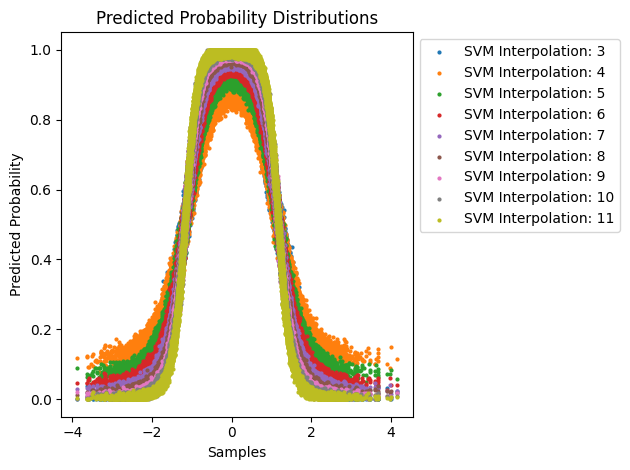

In [97]:
util.plot_p_pred_dists(
    np.arange(3, 12, 1),
    X,
    util.svm_interpolated_probs,
    "SVM Interpolation"
)

Plotting True Probability Reliability Diagram...
avg noise  0.02037768027143555


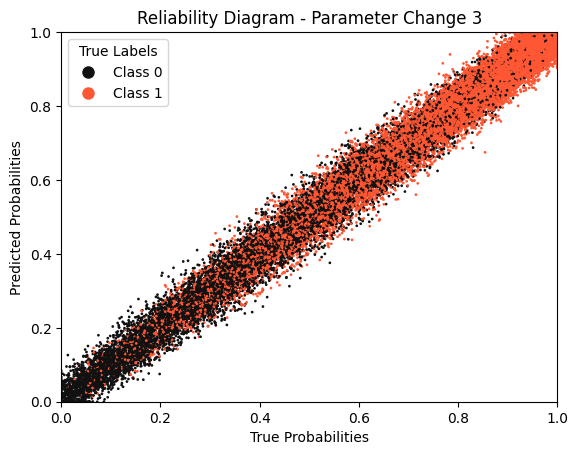

avg noise  0.017832131814995576


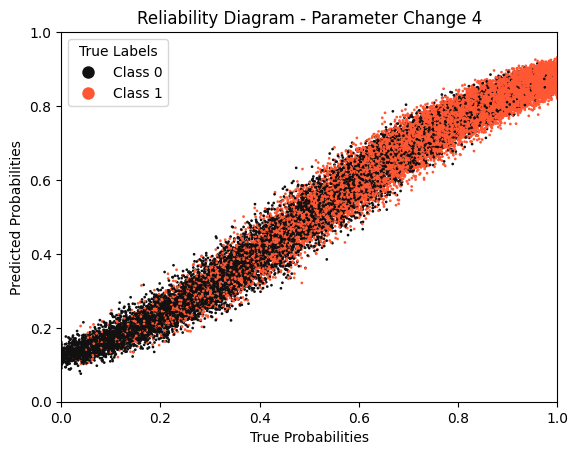

avg noise  0.015864475834505756


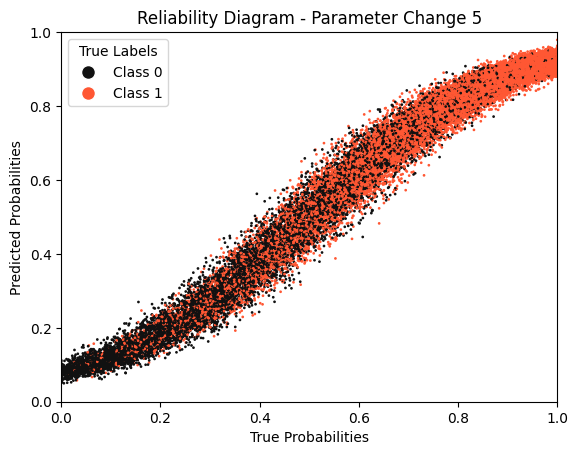

avg noise  0.014114185046781174


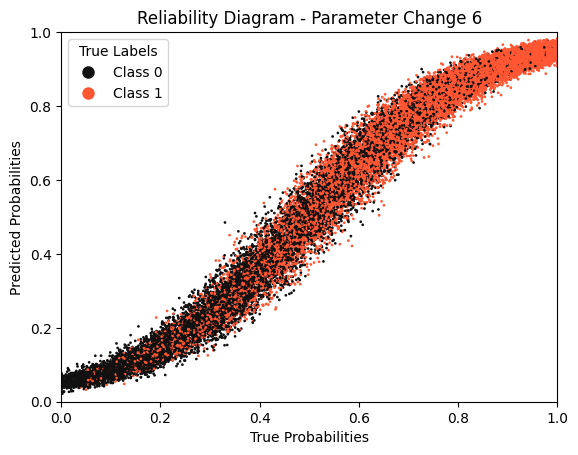

avg noise  0.01254609368437723


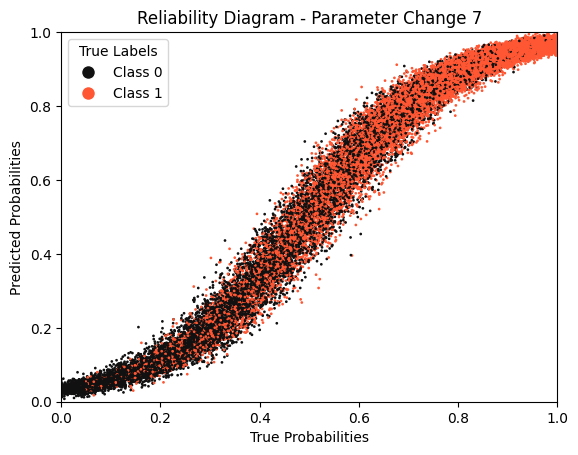

avg noise  0.011507433630657322


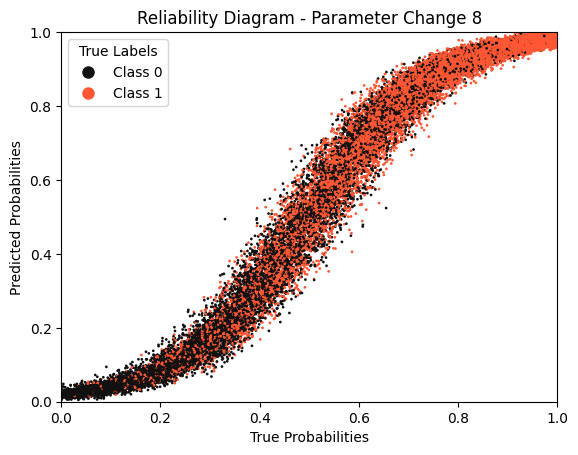

avg noise  0.010565982284690037


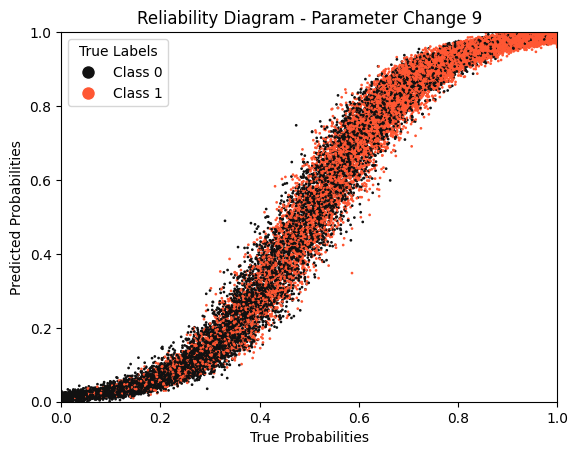

avg noise  0.009916289349610046


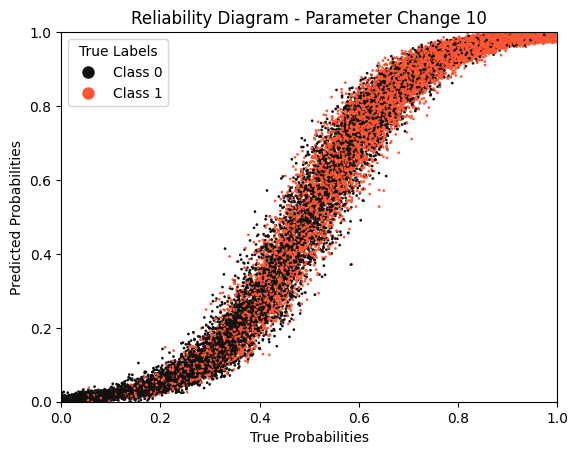

avg noise  0.009404919257210162


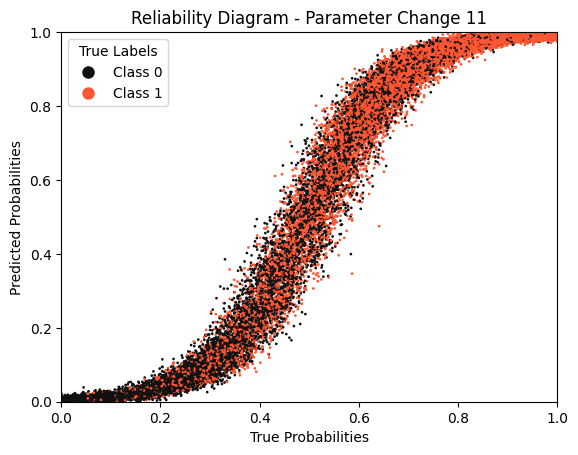

In [98]:
util.plot_p_true_reliability_diagrams(
    np.arange(3, 12, 1),
    X, p_true, y_true,
    util.svm_interpolated_probs,
    "Parameter Change"
)

In [99]:
true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals = (
    util.calculate_metrics(
        noises,
        p_true, y_true, X, 
        util.svm_interpolated_probs,
        log="Parameter Change"
    )
)

Parameter Change:  3.0
avg noise  0.020505485505197978
True ECE:  0.02864157298292173
ECE:  0.004496623470297243
Balance Score:  -0.00053129275
FCE:  0.003
TCE:  0.608125
KSCE:  0.002320648288726801
ACE:  0.005513059090893561
Parameter Change:  3.1
avg noise  0.020165764056922796
True ECE:  0.10051204064414025
ECE:  0.09471877306039721
Balance Score:  0.09471877
FCE:  0.095
TCE:  0.9063
KSCE:  0.0675676377296448
ACE:  0.09471877306039715
Parameter Change:  3.2
avg noise  0.02006394959965802
True ECE:  0.09557344453961715
ECE:  0.08826060440716353
Balance Score:  0.088260606
FCE:  0.088
TCE:  0.8749750000000001
KSCE:  0.06407569961547854
ACE:  0.08884088649540886
Parameter Change:  3.3000000000000003
avg noise  0.01958978498117947
True ECE:  0.0907541131049854
ECE:  0.08302563780013156
Balance Score:  0.083025634
FCE:  0.083
TCE:  0.876725
KSCE:  0.06070934848785403
ACE:  0.08302563780013156
Parameter Change:  3.4000000000000004
avg noise  0.019435604024845662
True ECE:  0.0859463386963

Plotting metrics...


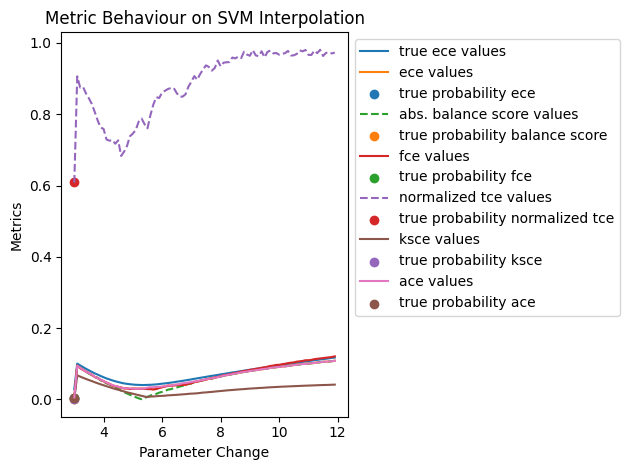

In [100]:
util.plot_metrics(
    noise, noises,
    p_true, y_true,
    true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals,
    "Metric Behaviour on SVM Interpolation",
    "Parameter Change"
)